<a href="https://colab.research.google.com/github/ChenghaoXu1718/SEP-788-789/blob/main/GroupProject/Report1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Clone data from Github

In [ ]:
!git clone https://github.com/ChenghaoXu1718/SEP-788-789

#Import

In [53]:
import pandas as pd
import cv2
from google.colab.patches import cv2_imshow
import os
import matplotlib.pyplot as plt
import numpy as np
import glob

#Read data-BlurCar1
##image size = 640*480

In [66]:
from pandas._libs import index
label_folder = '/content/SEP-788-789/Datasets/BlurCar1/groundtruth_rect.txt'
image_folder = '/content/SEP-788-789/Datasets/BlurCar1/img'
head = ['x', 'y', 'box-width', 'box-length']
labeldata = pd.read_csv(label_folder, sep= '\t', names = head)

def load_images_from_folder(image_folder):
  images = []
  images_filename = []
  lst = os.listdir(image_folder)
  lst.sort()

  for file in lst:
        img = cv2.imread(os.path.join(image_folder,file))
        if img is not None:
            images.append(img)
            images_filename.append(file)
        
  return images, images_filename

images, images_filename = load_images_from_folder(image_folder)
imagedata = pd.DataFrame(list(zip(images_filename, images)),columns=['imageFilname', 'image-read'])

df = labeldata.join( imagedata)
df.head()


,x,y,box-width,box-length,imageFilname,image-read
0,250,168.0,106.0,105.0,0247.jpg,"[[[255, 235, 183], [255, 235, 183], [255, 239,..."
1,249,170.0,106.0,106.0,0248.jpg,"[[[255, 236, 181], [255, 237, 182], [255, 238,..."
2,240,179.0,108.0,106.0,0249.jpg,"[[[255, 232, 176], [255, 232, 176], [254, 234,..."
3,223,191.0,107.0,111.0,0250.jpg,"[[[255, 238, 181], [255, 238, 181], [255, 239,..."
4,212,209.0,116.0,105.0,0251.jpg,"[[[255, 235, 180], [255, 234, 179], [255, 235,..."


Error: Runtime no longer has a reference to this dataframe, please re-run this cell and try again.
Error: Runtime no longer has a reference to this dataframe, please re-run this cell and try again.
Error: Runtime no longer has a reference to this dataframe, please re-run this cell and try again.


#Show masks
slow method for demo

RangeIndex(start=0, stop=742, step=1)


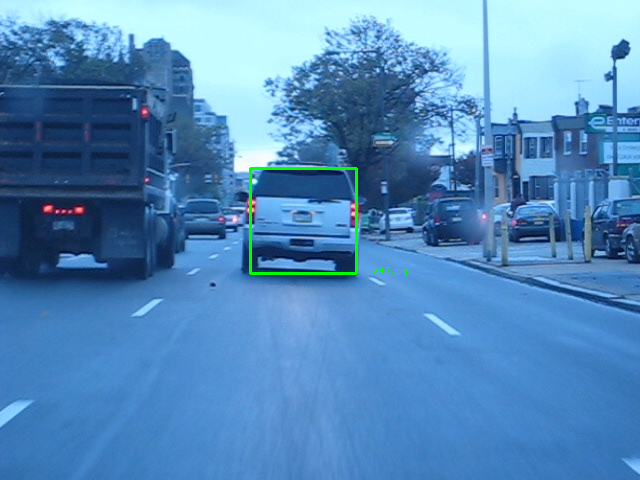

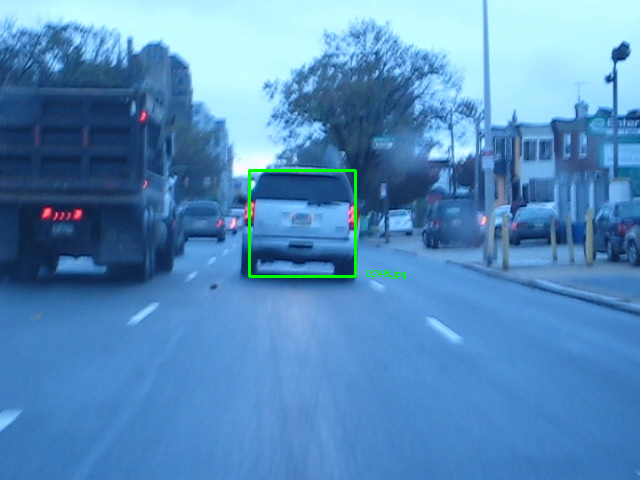

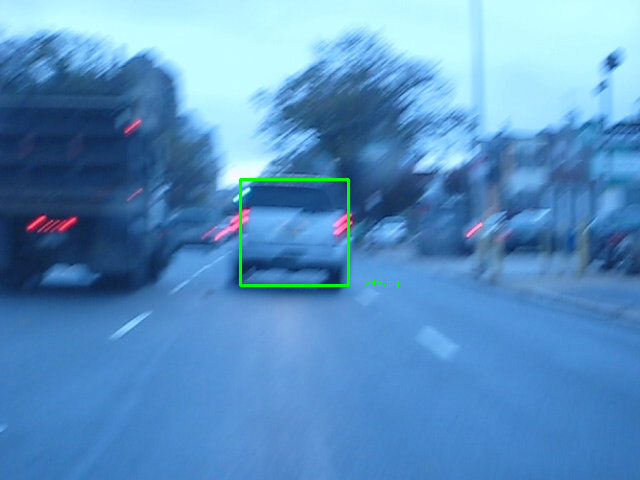

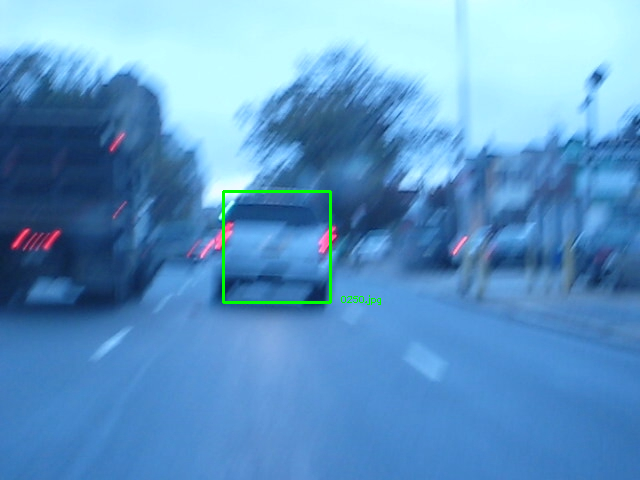

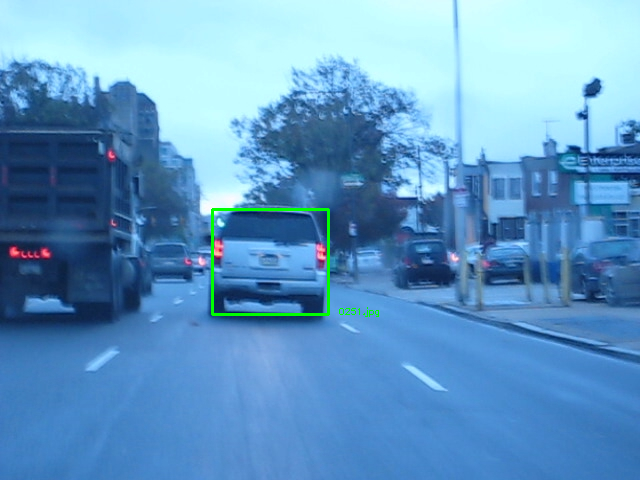

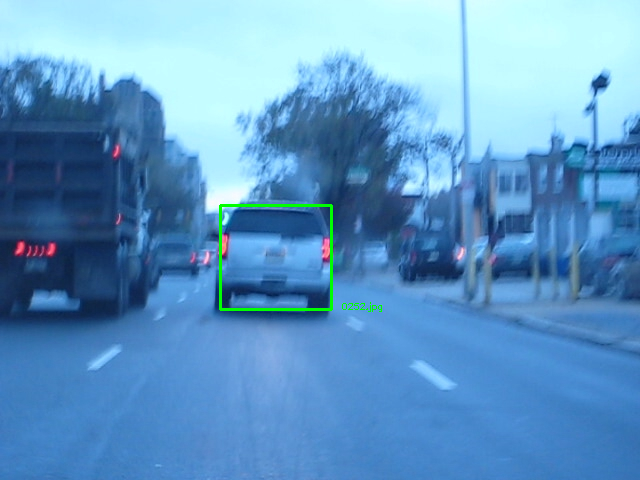

In [82]:
index = df.index
print(index)
for idx in range(6):
  tdf = df.iloc[idx]
  img = tdf['image-read']
  name = tdf['imageFilname']
  x_min = int(tdf['x'])
  y_min = int(tdf['y'])
  x_max = x_min + int(tdf['box-width'])
  y_max = y_min + int(tdf['box-length'])
  cv2.rectangle(img,(x_min,y_min),(x_max,y_max),(0,255,0),2)
  cv2_imshow(img)
  cv2.putText(img,'name',(x_max+10,y_max),0,0.3,(0,255,0))


